In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, MeanShift, AffinityPropagation, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, log_loss, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier

In [167]:
df = pd.read_csv('winequalityN.csv')

In [168]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

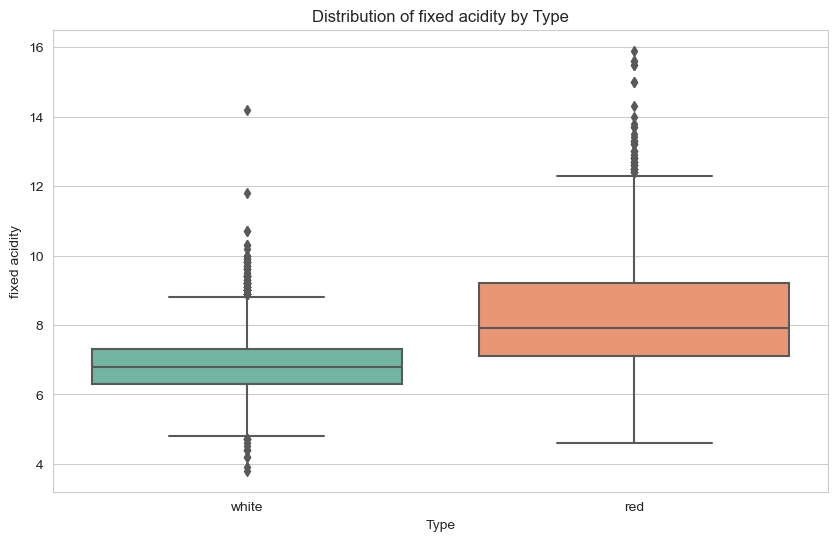

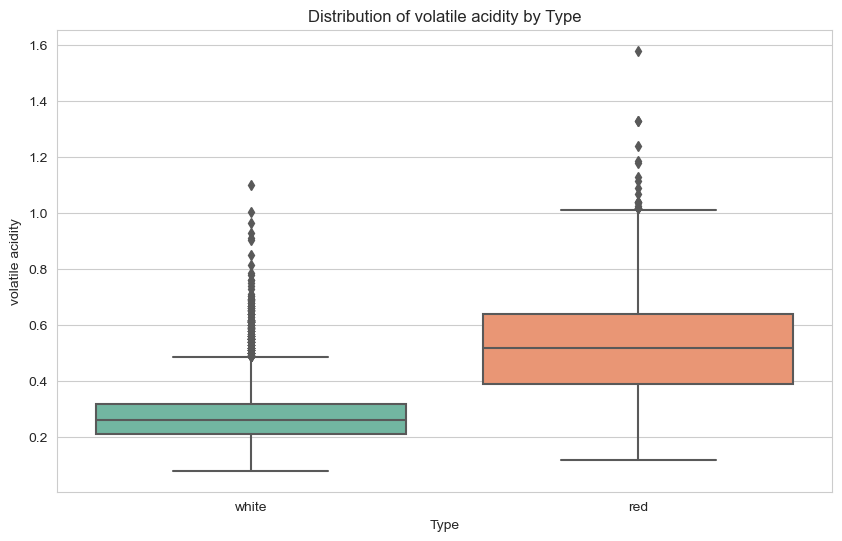

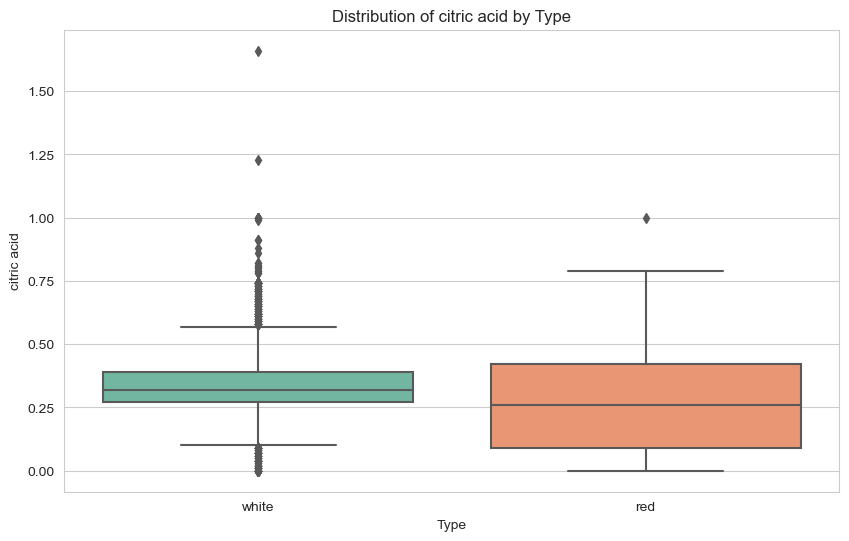

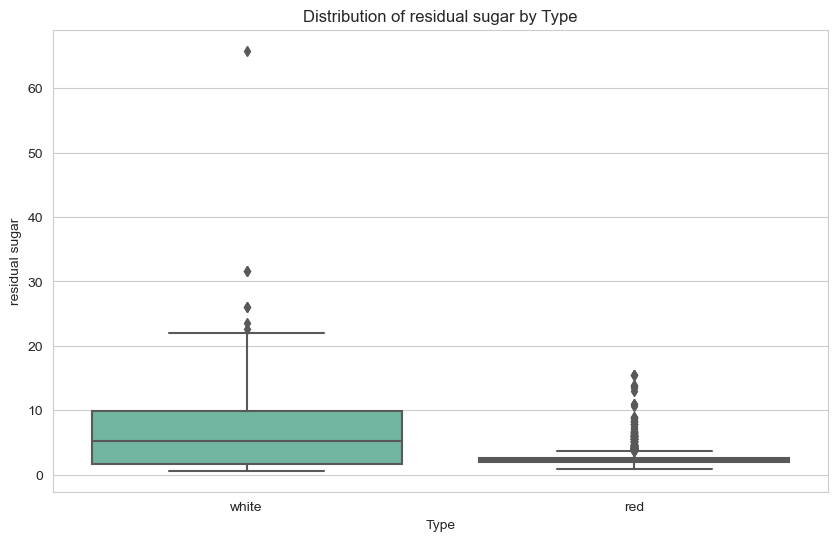

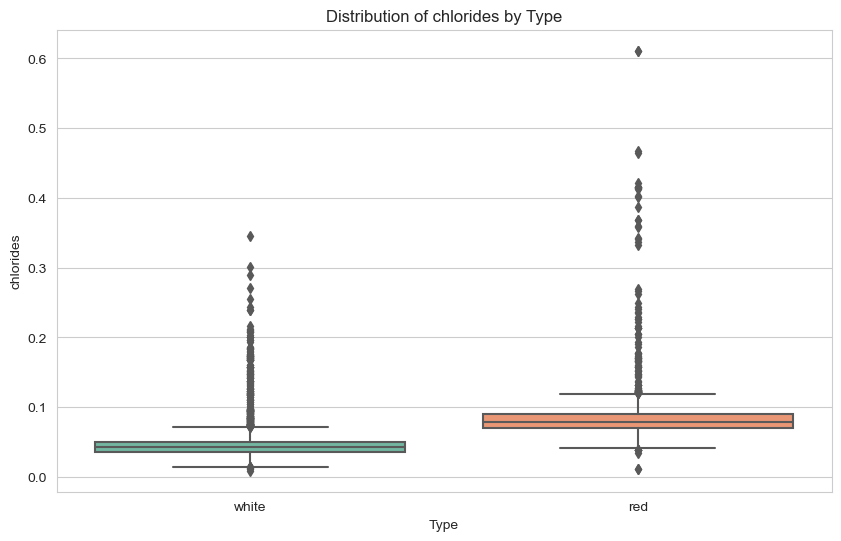

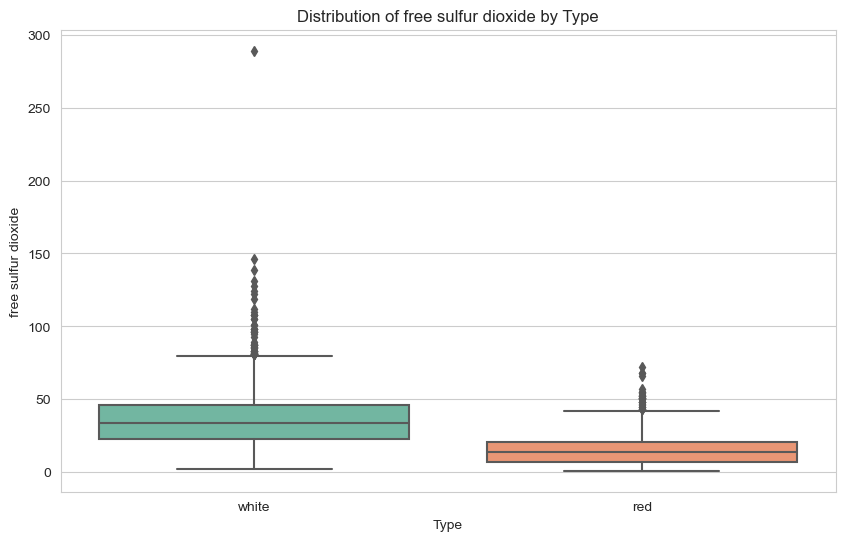

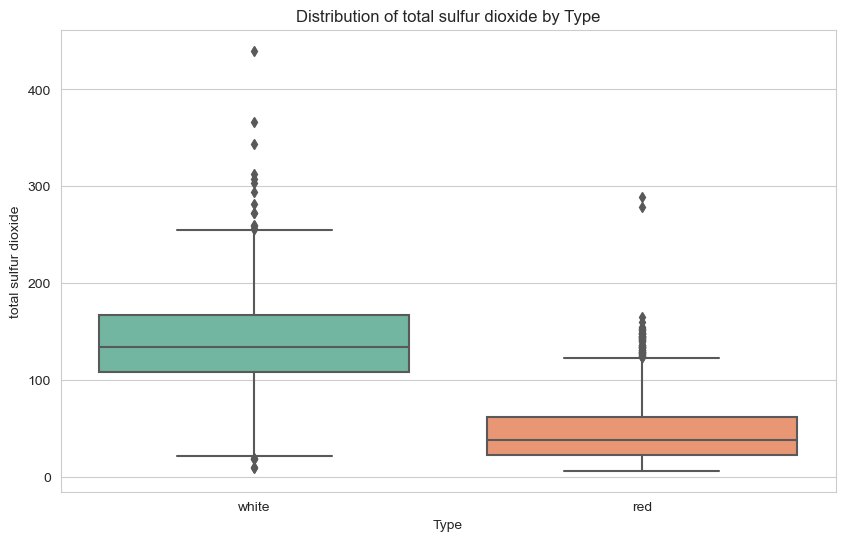

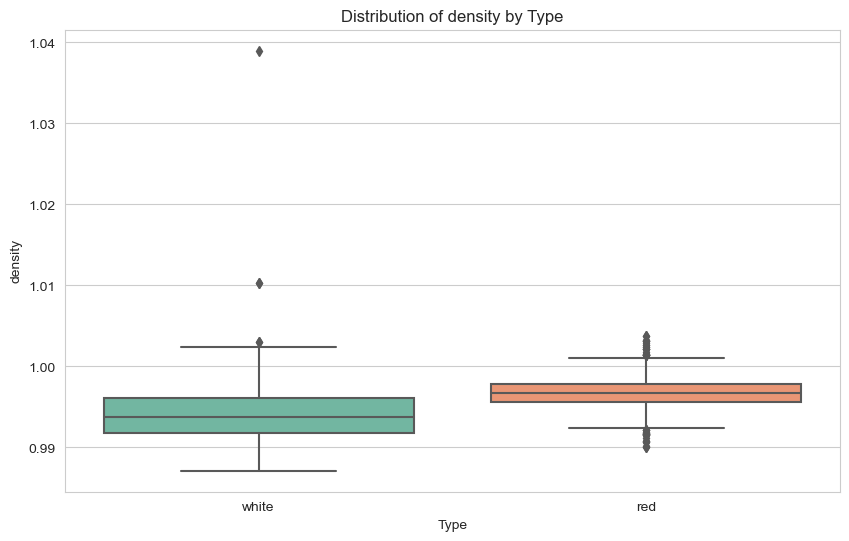

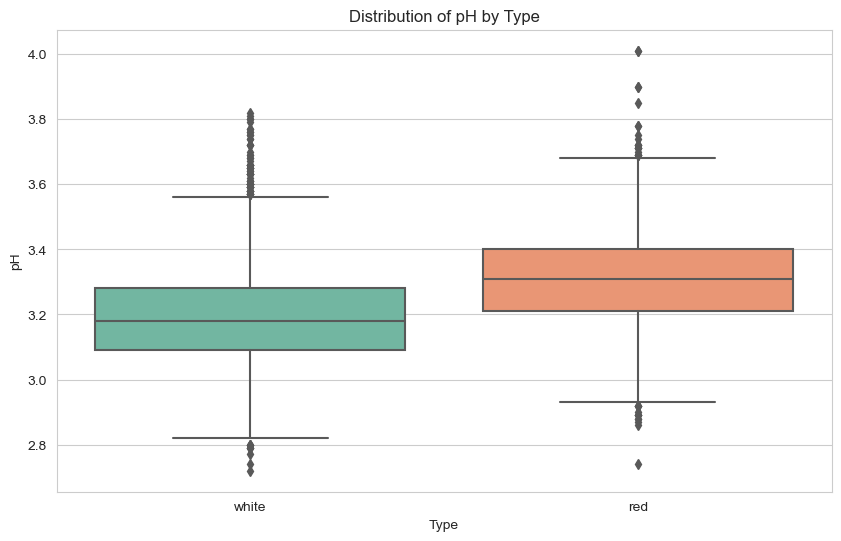

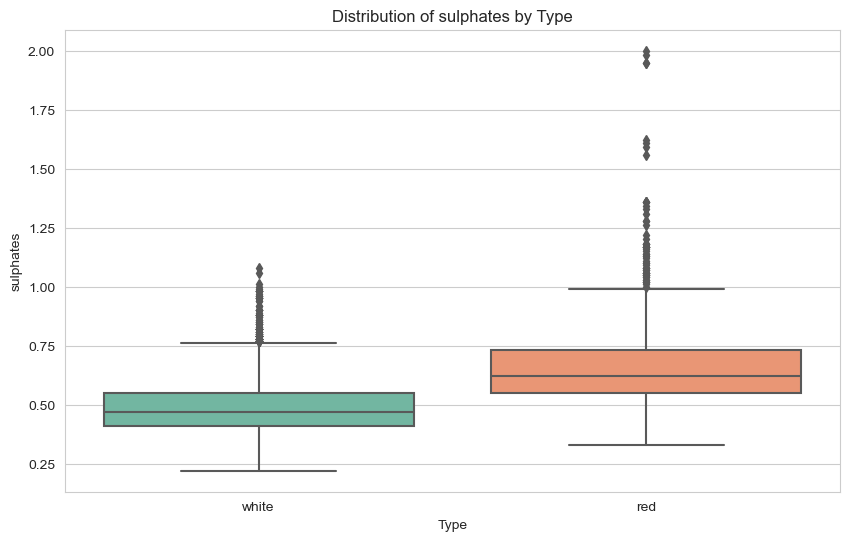

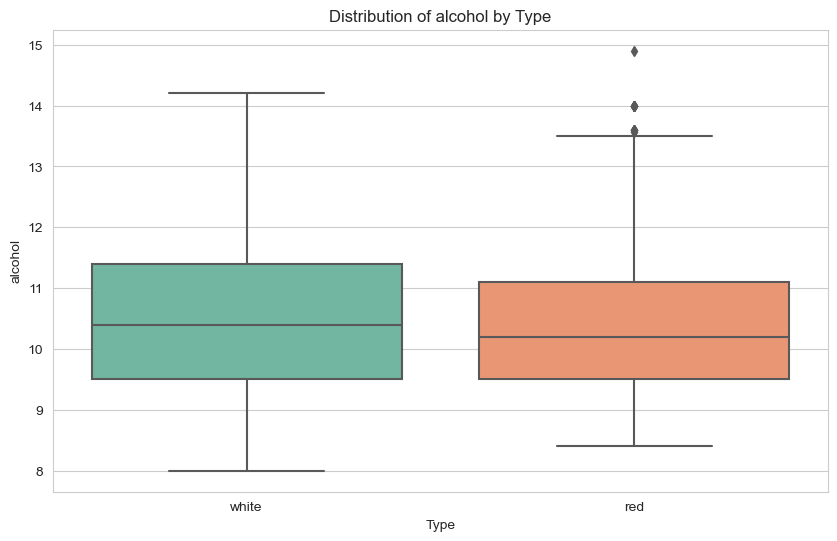

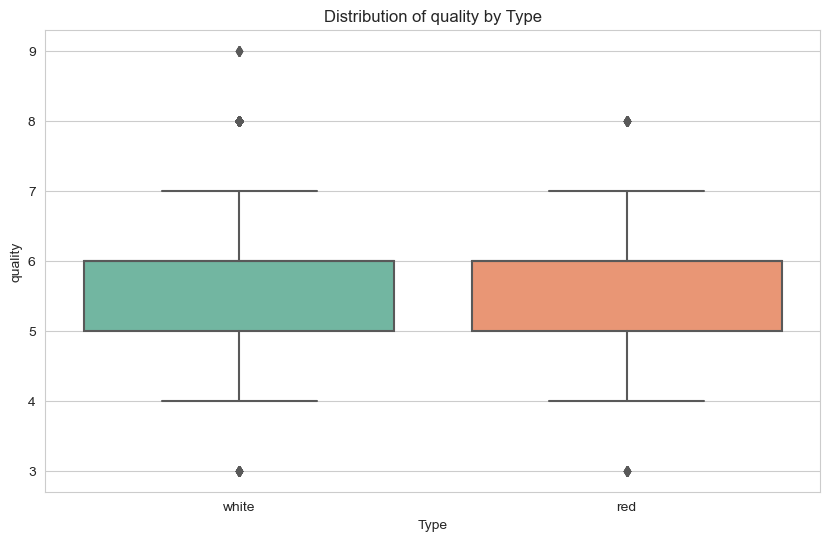

In [169]:
sns.set_style("whitegrid")

characteristics = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                   'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

for char in characteristics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='type', y=char, data=df, palette='Set2')
    plt.title(f'Distribution of {char} by Type')
    plt.xlabel('Type')
    plt.ylabel(char)
    plt.show()


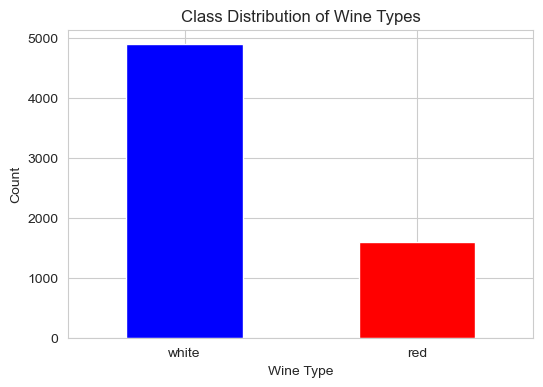

Class Distribution:
type
white    4898
red      1599
Name: count, dtype: int64


In [170]:
class_distribution = df['type'].value_counts()

plt.figure(figsize=(6, 4))

class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Class Distribution:")
print(class_distribution)

In [171]:
# So now we can give a mark that our model is unbalanced classification problem or in other words dataset

In [172]:
# Normalize data

df.dropna(inplace=True)
class_distribution = df['type'].value_counts()
class_distribution.value_counts()

count
4870    1
1593    1
Name: count, dtype: int64

In [173]:
# Next step train model and make a prediction

X = df.drop(columns=['type'])  # Features
y = df['type']  # Target variable, our vine color red or white
y = df['type'].replace({'red': True, 'white': False})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ROC Score
# 1 - best
# 0.5 random
# for y we have TPR and for x - FPR
# so basically we have how many TPR we have for some number of FPR

# Precision
# TP / (TP + FN) ability to locate needed class between others
# 1 - best

# Recall
# Повнота, demonstrate ability to locate needed class
# 1 - best

# Log Loss
# If simple,  L(y|q)= -y log(q) - (1-y) log(q-1)
# 0 - is best

# Confusion Matrix
# TP  FP
# FN  TN

# Desision Tree

In [174]:
#!pip install tensorflow
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

In [192]:
# default loss function 
dt_model_l = DecisionTreeClassifier(criterion = 'log_loss')

dt_model_l.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
dt_classification_report = classification_report(y_test, y_pred_dt)
dt_score = dt_model_l.score(X_test, y_test)

In [193]:
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Score:", dt_score) 
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)
print("Decision Tree Classification Report:")
print(dt_classification_report)

Decision Tree Accuracy: 0.9860752965446106
Decision Tree Score: 0.9860752965446106
Decision Tree Confusion Matrix:
[[1457    8]
 [  19  455]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1465
        True       0.98      0.96      0.97       474

    accuracy                           0.99      1939
   macro avg       0.98      0.98      0.98      1939
weighted avg       0.99      0.99      0.99      1939



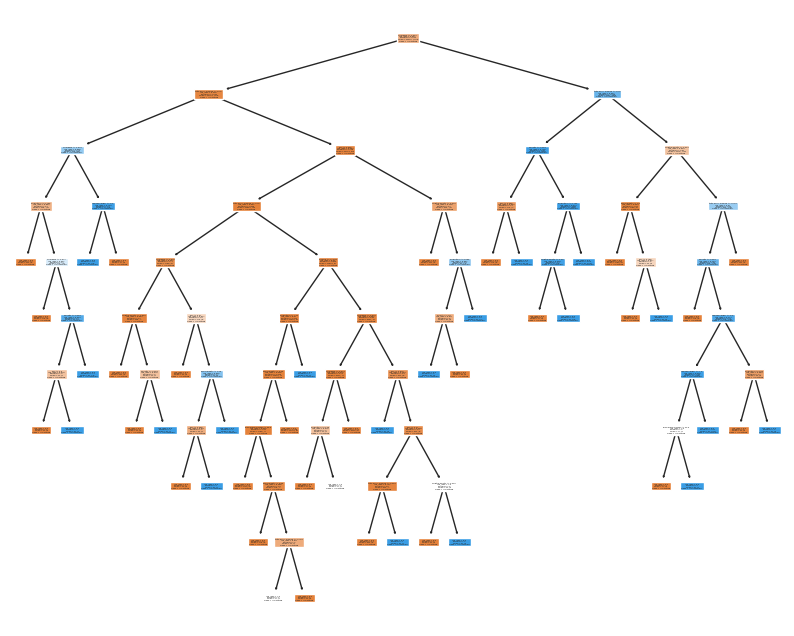

In [194]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(dt_model_l, feature_names=X.columns.tolist(), class_names=class_names, filled=True)
plt.show()



In [198]:
# default loss function 
dt_model_e = DecisionTreeClassifier(criterion = 'entropy')

dt_model_e.fit(X_train, y_train)

y_pred_dt = dt_model_e.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
dt_classification_report = classification_report(y_test, y_pred_dt)
dt_score = dt_model_e.score(X_test, y_test)

In [199]:
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Score:", dt_score) 
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)
print("Decision Tree Classification Report:")
print(dt_classification_report)

Decision Tree Accuracy: 0.9819494584837545
Decision Tree Score: 0.9819494584837545
Decision Tree Confusion Matrix:
[[1456    9]
 [  26  448]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.99      0.99      1465
        True       0.98      0.95      0.96       474

    accuracy                           0.98      1939
   macro avg       0.98      0.97      0.98      1939
weighted avg       0.98      0.98      0.98      1939



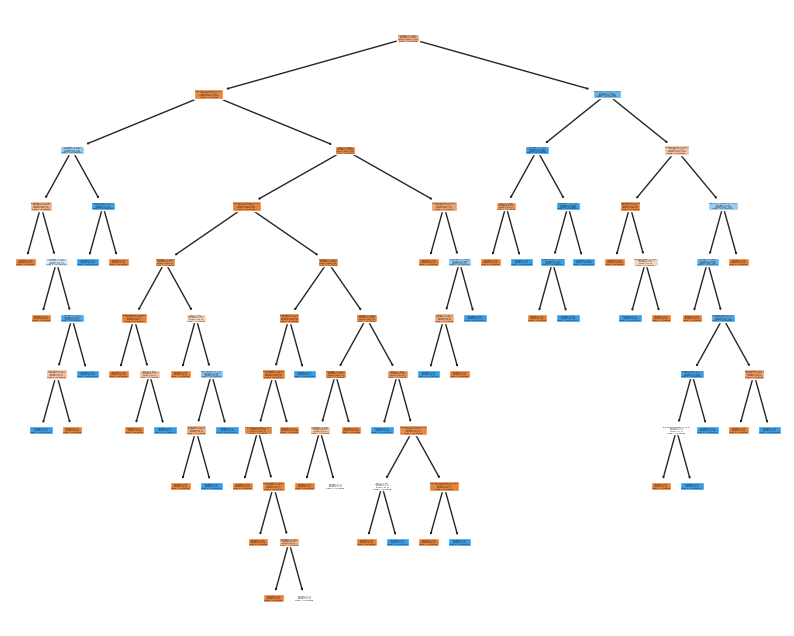

In [200]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(dt_model, feature_names=X.columns.tolist(), class_names=class_names, filled=True)
plt.show()



# SVM

In [152]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# SVM model
svm_model = SVC(kernel='linear')

# Training the SVM model
svm_model.fit(X_train, y_train)

# Predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluation metrics
svm_accuracy = svm_model.score(X_test, y_test)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
svm_classification_report = classification_report(y_test, y_pred_svm)
svm_score = svm_model.score(X_test, y_test)  # SVM score

print("SVM Accuracy:", svm_accuracy)
print("SVM Score:", svm_score)  # Print SVM score
print("SVM Confusion Matrix:")
print(svm_conf_matrix)
print("SVM Classification Report:")
print(svm_classification_report)


SVM Accuracy: 0.9860752965446106
SVM Score: 0.9860752965446106
SVM Confusion Matrix:
[[1459    6]
 [  21  453]]
SVM Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      1465
        True       0.99      0.96      0.97       474

    accuracy                           0.99      1939
   macro avg       0.99      0.98      0.98      1939
weighted avg       0.99      0.99      0.99      1939



In [153]:
# Part 4

In [203]:
dfi = pd.read_csv('IRIS.csv')

In [204]:
dfi.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

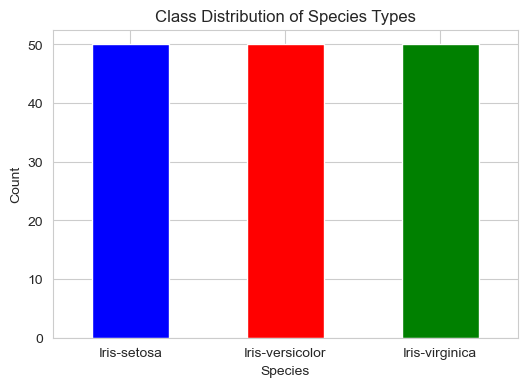

Class Distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [205]:
class_distribution = dfi['species'].value_counts()

plt.figure(figsize=(6, 4))

class_distribution.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Class Distribution of Species Types')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Class Distribution:")
print(class_distribution)

In [206]:
# So we have equal distribution

In [207]:
X = dfi.drop(columns=['species'])
y = dfi['species']

# Combination of SVM

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
class_pairs = [(class_names[i], class_names[j]) for i in range(len(class_names)) for j in range(i+1, len(class_names))]

svm_models = []

for class_pair in class_pairs:
    class_1, class_2 = class_pair
    X_train_pair = X_train[(y_train == class_1) | (y_train == class_2)]
    y_train_pair = y_train[(y_train == class_1) | (y_train == class_2)]
    
    # SVM model
    svm_model = SVC(kernel='linear')

    svm_model.fit(X_train_pair, y_train_pair)
    svm_models.append(svm_model)

In [209]:
from collections import Counter


def ensemble_predict(models, X):
    predictions = []

    for model in models:
        y_pred_proba = model.predict(X)
        predictions.append(y_pred_proba)
        
    transformed = []
    
    for subarray in list(zip(*predictions)):
        
        element_counts = Counter(subarray)
        most_common_element = max(element_counts, key=element_counts.get)
        transformed.append(most_common_element)
        
    return transformed

In [210]:
accuracy_score(ensemble_predict(svm_models, X_test), y_test)

0.9666666666666667

# Combination of DesisionTree

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
class_pairs = [(class_names[i], class_names[j]) for i in range(len(class_names)) for j in range(i+1, len(class_names))]

dt_models = []

for class_pair in class_pairs:
    class_1, class_2 = class_pair
    X_train_pair = X_train[(y_train == class_1) | (y_train == class_2)]
    y_train_pair = y_train[(y_train == class_1) | (y_train == class_2)]
    
    # SVM model
    dt_model = DecisionTreeClassifier(criterion = 'entropy')

    dt_model.fit(X_train_pair, y_train_pair)
    dt_models.append(dt_model)

In [212]:
accuracy_score(ensemble_predict(dt_models, X_test), y_test)

0.9666666666666667